# Análisis de la demanda de talles y comportamiento de compra por provincias de Tochana

**Fecha: Marzo 2025**

**Alumna: Carvajal Ceci, Katja**

**Dataset: Ventas Tochana 6/2023 - 6/2024 (mercadolibre) y Datos de contacto de compradores históricos (sitio web)**

1.  ORIGEN DE LOS DATOS

La información utilizada para el análisis del presente proviene de la plataforma de comercio electrónico Mercado Libre, específicamente de la marca de indumentaria femenina Tochana. Esta marca se caracteriza por ofrecer una amplia curva de talles que abarca desde el talle M hasta el 5XL, destacándose por atender un segmento poco explorado en el mercado de ropa femenina. El período de análisis comprende desde el 06 de junio de 2023 hasta el 06 de junio de 2024, e incluye datos detallados de cada transacción realizada en ese intervalo. Entre los datos recopilados se encuentran: descripción del producto, talle, precio y datos del comprador. Todas las transacciones analizadas corresponden exclusivamente a operaciones realizadas dentro del territorio argentino. Además se agrega para el análisis geográfico la base de datos del sitio web de la marca de donde se destacan la localidad de los compradores. Dicha base de datos no se considera histórica por la marca, debido que se construyó cuando comenzó la venta online en el año 2021 hasta Abril 2025.

2.  PREGUNTAS DE INTERES

*   ¿Cuál es el talle más vendido a nivel nacional?

    *  ¿Existen diferencias significativas en la venta de talles grandes (2XL, 3XL, 4XL y 5XL) y pequeños (M, L, XL)?

*  ¿Qué provincias presentan la mayor cantidad de ventas?

  *  ¿Las zonas con más ventas también tienen mayores ingresos totales?

  *  ¿Existen diferencias en la demanda de talles grandes o pequeños según la provincia?

*  ¿Dónde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?

*  ¿Hay diferencias entre las zonas con mayores ventas entre la web y la plataforma de mercadolibre?

3. HIPÓTESIS


*Preferencia por talles grandes:* Dada la limitada oferta de talles grandes en el mercado y la extensa curva de talles ofrecida por Tochana, se espera que los talles más grandes (2XL, 3XL, 4XL y 5XL) sean los más demandados en comparación con los talles más pequeños (S, M, L, XL), que enfrentan una mayor competencia en el mercado.

*Variación regional de la demanda:* Se plantea la posibilidad de que la demanda de los productos de la marca Tochana varíe según la región geográfica de Argentina, siendo las regiones del interior del país las que podrían concentrar una mayor proporción de ventas en relación a la cantidad de población debido a una menor oferta en la zona

# SENTENCIAS

In [ ]:
#importo las librerías a usar

# Bibliotecas para manejo de datos y operaciones matemáticas
import pandas as pd
import numpy as np

# Bibliotecas para visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Biblioteca para visualización de datos nulos
import missingno as msno

In [ ]:
colores_marca = ['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'
df = pd.read_excel(archivo_excel)

In [ ]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Clientes web 2021 2025.xlsx'
dfweb = pd.read_excel(archivo_excel)

# **Análisis exploratorio de la base de datos de ventas de Mercadolibre**

In [ ]:
#Veo el tamaño del dataset de ventas
df.shape

(3508, 9)

In [ ]:
#Veo que tipo de datos para cada columna
df.dtypes

,0
ID_venta,int64
ID_clientes,object
Ingresos por productos (ARS),float64
Cargo por venta e impuestos,float64
Costos de envío,float64
Total (ARS),float64
ID_publicaciones,object
ID_Color,float64
ID_Talle,float64


In [ ]:
#Obtengo una vista general del dataset
display(df.head())

,ID_venta,ID_clientes,Ingresos por productos (ARS),Cargo por venta e impuestos,Costos de envío,Total (ARS),ID_publicaciones,ID_Color,ID_Talle
0,2000008457000154,31474330,29999.00,-5347.32,-4182.99,20468.69,MLA667305456,1.0,6.0
1,2000008456300770,27277464018,30689.07,-5009.99,-4182.99,21496.09,MLA1374337563,2.0,8.0
2,2000008455133668,31474330,29999.00,-5347.32,-4182.99,0.00,MLA667305456,3.0,6.0
3,2000008454386024,20475232,28999.00,-4734.08,-4182.99,20081.93,MLA1141435462,4.0,7.0
4,2000008454078018,39089306,30599.10,-4995.30,-4182.99,21420.81,MLA920008017,5.0,8.0


In [ ]:
print(df.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')


In [ ]:
#Leo el Excel e imprimo los nombres de las hojas disponibles del archivo
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'

dfs = pd.read_excel(archivo_excel, sheet_name=None)

print(dfs.keys())

dict_keys(['Ventas', 'Publicaciones', 'Categoría', 'Talle', 'Color', 'Clientes', 'Ciudad', 'Provincia'])


El dataset utilizado cuenta con ocho solapas:

Ventas

Publicaciones

Categoría

Talle

Color

Clientes

Ciudad

Provincia

Transformé cada una en un dataframe para poder utilizarlos a lo largo del análisis

In [ ]:
df_ventas = dfs['Ventas']
df_publicaciones = dfs['Publicaciones']
df_categoria = dfs['Categoría']
df_talle = dfs['Talle']
df_color = dfs['Color']
df_clientes = dfs['Clientes']
df_ciudad = dfs['Ciudad']
df_provincia = dfs['Provincia']

In [ ]:
display("Ventas:")
display(df_ventas.head())
display("\nPublicaciones:")
display(df_publicaciones.head())
display("\nCategoría:")
display(df_categoria.head())
display("\nTalle:")
display(df_talle.head())
display("\nColor:")
display(df_color.head())
display("\nClientes:")
display(df_clientes.head())
display("\nCiudad:")
display(df_ciudad.head())
display("\nProvincia:")
display(df_provincia.head())

'Ventas:'

,ID_venta,ID_clientes,Ingresos por productos (ARS),Cargo por venta e impuestos,Costos de envío,Total (ARS),ID_publicaciones,ID_Color,ID_Talle
0,2000008457000154,31474330,29999.00,-5347.32,-4182.99,20468.69,MLA667305456,1.0,6.0
1,2000008456300770,27277464018,30689.07,-5009.99,-4182.99,21496.09,MLA1374337563,2.0,8.0
2,2000008455133668,31474330,29999.00,-5347.32,-4182.99,0.00,MLA667305456,3.0,6.0
3,2000008454386024,20475232,28999.00,-4734.08,-4182.99,20081.93,MLA1141435462,4.0,7.0
4,2000008454078018,39089306,30599.10,-4995.30,-4182.99,21420.81,MLA920008017,5.0,8.0


'\nPublicaciones:'

,id_publicacion,Título,id_categoría,Visitas totales,Ventas totales
0,1108231655,Vestido Largo Cruzado Seda Fria Talles Grandes...,1,90189,1651
1,886360539,Vestido Largo More Con Bolsillos Talles Grande...,1,32165,817
2,1117143028,Vestido More Corto Seda Fria Talles Grandes Y ...,1,29172,566
3,830849228,Vestido Luce Manga Corta Con Bolsillos Talles ...,1,16596,476
4,914742415,Pantalon Bengalina Super Elastizada Talle Gran...,2,15808,476


'\nCategoría:'

,id_categoría,Nombre_categoria
0,1,Vestidos
1,2,Pantalones
2,3,"Remeras, Musculosas y Chombas"
3,4,Buzos y Hoodies
4,5,"Camperas, Tapados y Trenchs"


'\nTalle:'

,ID_Talle,nombre_Talle
0,1,S
1,2,M
2,3,L
3,4,XL
4,5,2XL


'\nColor:'

,ID_Color,nombre_Color
0,1,Azul marino
1,2,Aero
2,3,Bordó ( MODAL)
3,4,Gris
4,5,Borgoña


'\nClientes:'

,id_cliente,Primer nombre,Segundo nombre,Apellido,Id_Ciudad,Código postal
0,31474330,Irene,Claudina,Mendoza,1.0,3040.0
1,27277464018,Valeria,Soledad,Casanova,2.0,2820.0
2,20475232,Julio,Cesa,Rodriguez,3.0,1885.0
3,39089306,Paula,Valle,Benitez,4.0,5600.0
4,43339445,Brenda,Suyai,Espinoza,5.0,8300.0


'\nCiudad:'

,Id_Ciudad,Ciudad,id_provincia
0,1,San Justo,1
1,2,Gualeguaychú,2
2,3,Guillermo E Hudson,3
3,4,Las Heras,4
4,5,Neuquén,5


'\nProvincia:'

,id_provincia,Provincia
0,1,Santa Fe
1,2,Entre Ríos
2,3,Buenos Aires
3,4,Mendoza
4,5,Neuquen


In [ ]:
print(df_ventas.columns)
print(df_talle.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['ID_Talle', 'nombre_Talle'], dtype='object')


In [ ]:
# Relacion talle / ingresos
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle')['Ingresos por productos (ARS)'].sum().reset_index()
ventas_por_talle = ventas_por_talle.sort_values(by='Ingresos por productos (ARS)', ascending=False)

ventas_por_talle


,nombre_Talle,Ingresos por productos (ARS)
3,5XL,20200062.41
2,4XL,10349461.01
1,3XL,7656586.20
0,2XL,6175686.50
7,XL,4640499.28
4,L,1982458.00
5,M,1169066.79
6,S,73995.00


**¿Cuál es el talle más vendido a nivel nacional?**

In [ ]:
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle').size().reset_index(name='Unidades_vendidas')

# Ordeno de mayor a menor para una visualizacion mas clara
ventas_por_talle = ventas_por_talle.sort_values(by='Unidades_vendidas', ascending=False)

ventas_por_talle


,nombre_Talle,Unidades_vendidas
3,5XL,1055
2,4XL,663
1,3XL,512
0,2XL,410
7,XL,281
5,M,129
4,L,121
6,S,8


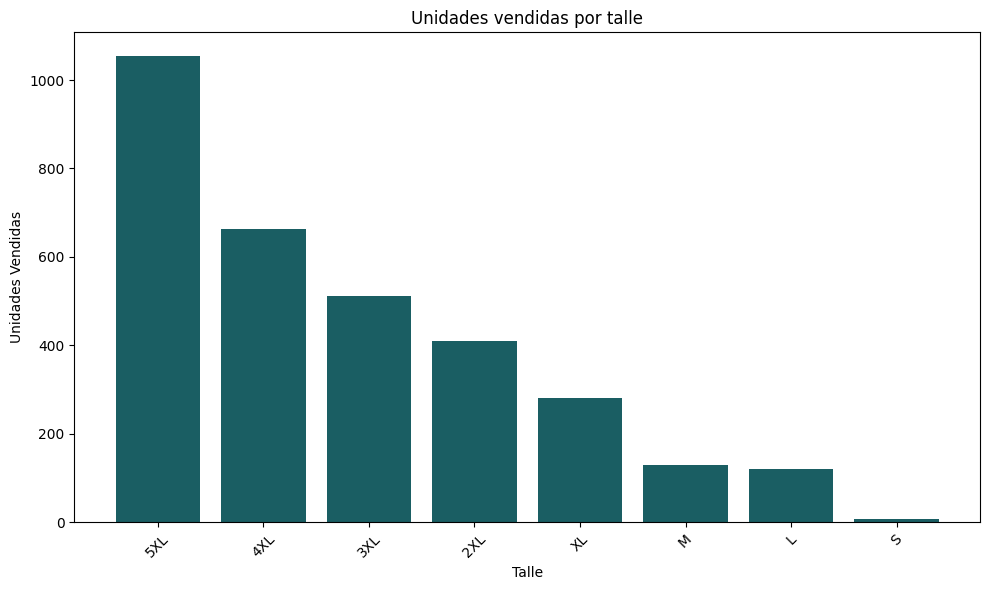

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_talle['nombre_Talle'],
        ventas_por_talle['Unidades_vendidas'],
        color=colores_marca[0])
plt.xlabel('Talle')
plt.ylabel('Unidades Vendidas')
plt.title('Unidades vendidas por talle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(df_clientes.columns)
print(df_ventas.columns)
print(df_provincia.columns)

Index(['id_cliente', 'Primer nombre', 'Segundo nombre', 'Apellido',
       'Id_Ciudad', 'Código postal'],
      dtype='object')
Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['id_provincia', 'Provincia'], dtype='object')


In [ ]:
df_ventas['ID_clientes'] = pd.to_numeric(df_ventas['ID_clientes'], errors='coerce')
df_ventas_clientes = df_ventas.merge(df_clientes, left_on='ID_clientes', right_on='id_cliente')
df_ventas_ciudad = df_ventas_clientes.merge(df_ciudad, left_on='Id_Ciudad', right_on='Id_Ciudad')
df_ventas_provincia = df_ventas_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia')

**¿Qué provincias presentan la mayor cantidad de ventas?**

/tmp/ipython-input-19-1262378564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
/tmp/ipython-input-19-1262378564.py:6: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)


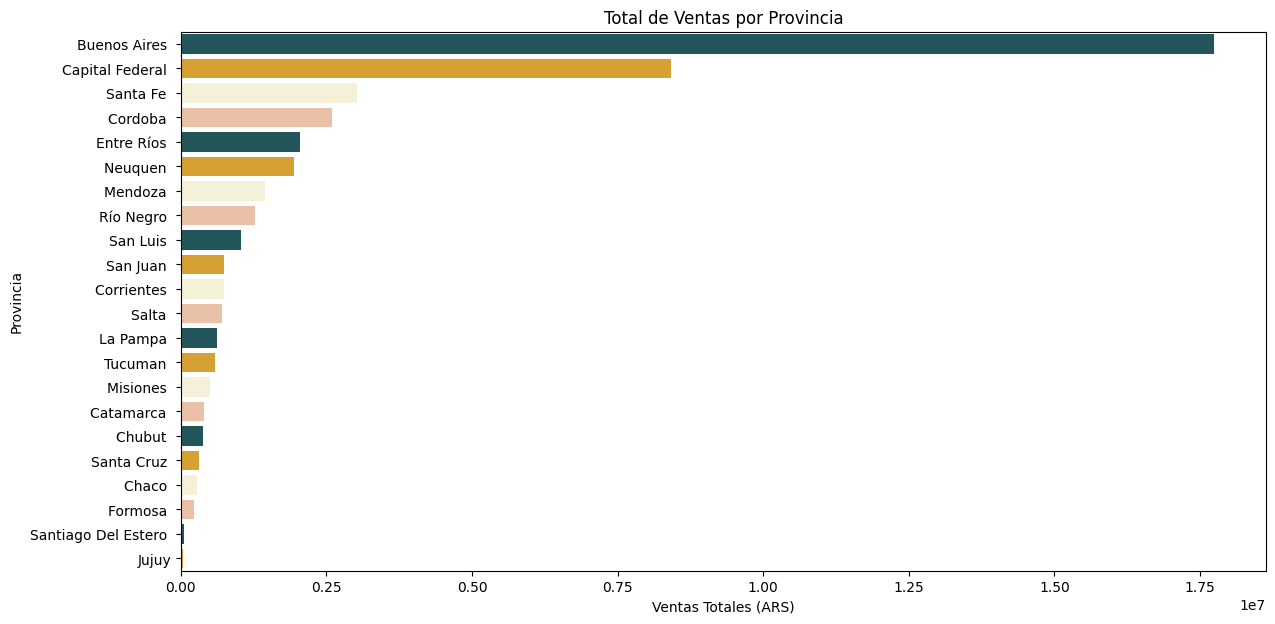

In [ ]:

ventas_por_provincia = df_ventas_provincia.groupby('Provincia')['Total (ARS)'].sum().reset_index()

ventas_por_provincia = ventas_por_provincia.sort_values(by='Total (ARS)', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
plt.title('Total de Ventas por Provincia')
plt.xlabel('Ventas Totales (ARS)')
plt.ylabel('Provincia')
plt.show()

In [ ]:
ventas_por_provincia


,Provincia,Total (ARS)
0,Buenos Aires,17744938.69
1,Capital Federal,8423509.51
19,Santa Fe,3015803.82
5,Cordoba,2601190.19
7,Entre Ríos,2051316.93
13,Neuquen,1940519.50
11,Mendoza,1452353.81
14,Río Negro,1268734.99
17,San Luis,1035122.72
16,San Juan,747597.88


El gráfico da cuenta de una mayor cantidad de ventas en la provincia de Buenos Aires en comparación con el interior del país en términos de ventas netas. Sin embargo es insuficiente para poner a prueba la hipótesis de que en el intrior del país más gente por población elije la marca debido a la poca oferta ya que el gráfico no toma en cuenta la densidad demográfica. Por lo cuál se profundiza el análisis con tal fin tomando en cuenta los datos del último Censo llevado a cabo en Argentina en el año 2022.

Obs.: Informacion extraída desde https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165

In [ ]:
data = {
    'Provincia': [
        'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Cordoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
        'La Pampa', 'Mendoza', 'Misiones', 'Neuquen',
        'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tucuman'
    ],
    'Poblacion': [
        17569677, 3169990, 433764, 1153818, 618746,
        3973160, 1099423, 1290975, 600702, 769634,
        371216, 1886503, 1164827, 771653,
        748056, 1357012, 825144, 477424, 273964,
        3670575, 1043821, 1604886
    ]
}

df_poblacion = pd.DataFrame(data)

display(df_poblacion)

,Provincia,Poblacion
0,Buenos Aires,17569677
1,Capital Federal,3169990
2,Catamarca,433764
3,Chaco,1153818
4,Chubut,618746
5,Cordoba,3973160
6,Corrientes,1099423
7,Entre Ríos,1290975
8,Formosa,600702
9,Jujuy,769634


In [ ]:
ventas_por_provincia['Provincia'] = ventas_por_provincia['Provincia'].str.strip() #utilicé el "strip" para eliminar los espacios en blanco porque no me coincidian los nombres en ambos dataframe
df_poblacion['Provincia'] = df_poblacion['Provincia'].str.strip()

ventas_con_poblacion = ventas_por_provincia.merge(df_poblacion, on='Provincia', how='left')

display(ventas_con_poblacion)


,Provincia,Total (ARS),Poblacion
0,Buenos Aires,17744938.69,17569677
1,Capital Federal,8423509.51,3169990
2,Santa Fe,3015803.82,3670575
3,Cordoba,2601190.19,3973160
4,Entre Ríos,2051316.93,1290975
5,Neuquen,1940519.50,771653
6,Mendoza,1452353.81,1886503
7,Río Negro,1268734.99,748056
8,San Luis,1035122.72,477424
9,San Juan,747597.88,825144


In [ ]:
ventas_con_poblacion['Ventas por Habitante'] = ventas_con_poblacion['Total (ARS)'] / ventas_con_poblacion['Poblacion']

In [ ]:
Ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)

/tmp/ipython-input-25-1321930039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
/tmp/ipython-input-25-1321930039.py:3: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)


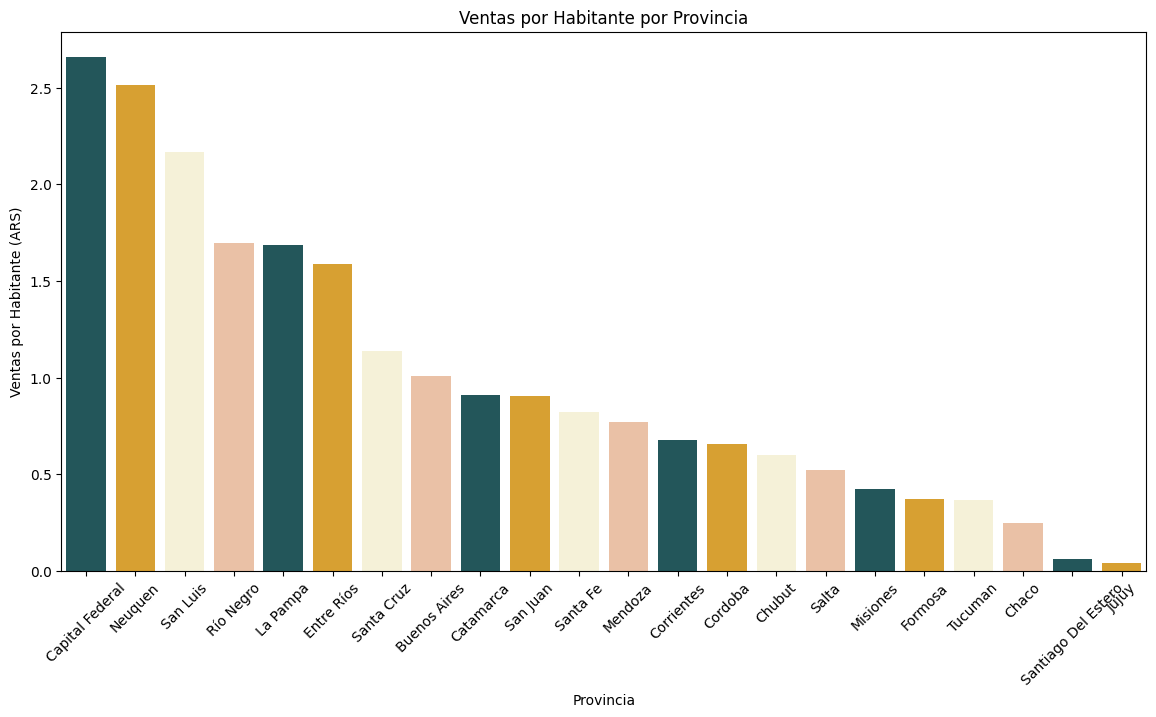

In [ ]:
ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
plt.title('Ventas por Habitante por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Ventas por Habitante (ARS)')
plt.xticks(rotation=45)
plt.show()

Se observa que al introducir la densidad demográfica como variante de análisis las ventas por provincias varían. Se puede observar como la Provincia de Buenos Aires que superaba en ventas al resto del país quedó por debajo de siete provincias. Siendo la Ciudad Autónoma de Buenos Aires (CABA) el distrito que condensa la mayor cantida de ventas por habitante.

En términos analíticos a diferencia del gráfico anterior se puede ver que si analizamos a las ventas concretadas en Buenos Aires y CABA en comparación con la suma del resto de las provincias se puede inferir que la mayor cantidad de ventas concretadas por cantidad de habitantes son en el interior del país. En relación a la hipótesis planteada en terminos de competitividad sigue siendo posible pensar que en el interior del país hay menor cantida de oferta de indumentaria femenina en talles reales por lo cuál mayor cantidad de personas eligen la marca.

In [ ]:
df_ventas.columns = df_ventas.columns.str.lower()
df_talle.columns = df_talle.columns.str.lower()
df_clientes.columns = df_clientes.columns.str.lower()
df_ciudad.columns = df_ciudad.columns.str.lower()
df_provincia.columns = df_provincia.columns.str.lower()


**¿Las zonas con más ventas también tienen mayores ingresos totales?**

In [ ]:
ventas_clientes = df_ventas.merge(df_clientes, left_on='id_clientes', right_on='id_cliente', how='left')

ventas_clientes_ciudad = ventas_clientes.merge(df_ciudad, left_on='id_ciudad', right_on='id_ciudad', how='left')

ventas_full = ventas_clientes_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia', how='left')

ventas_por_provincia = ventas_full.groupby('provincia').size().reset_index(name='cantidad_ventas')

ingresos_por_provincia = ventas_full.groupby('provincia')['total (ars)'].sum().reset_index(name='ingresos_totales')

zona_ventas_ingresos = ventas_por_provincia.merge(ingresos_por_provincia, on='provincia')


/tmp/ipython-input-28-3248936353.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


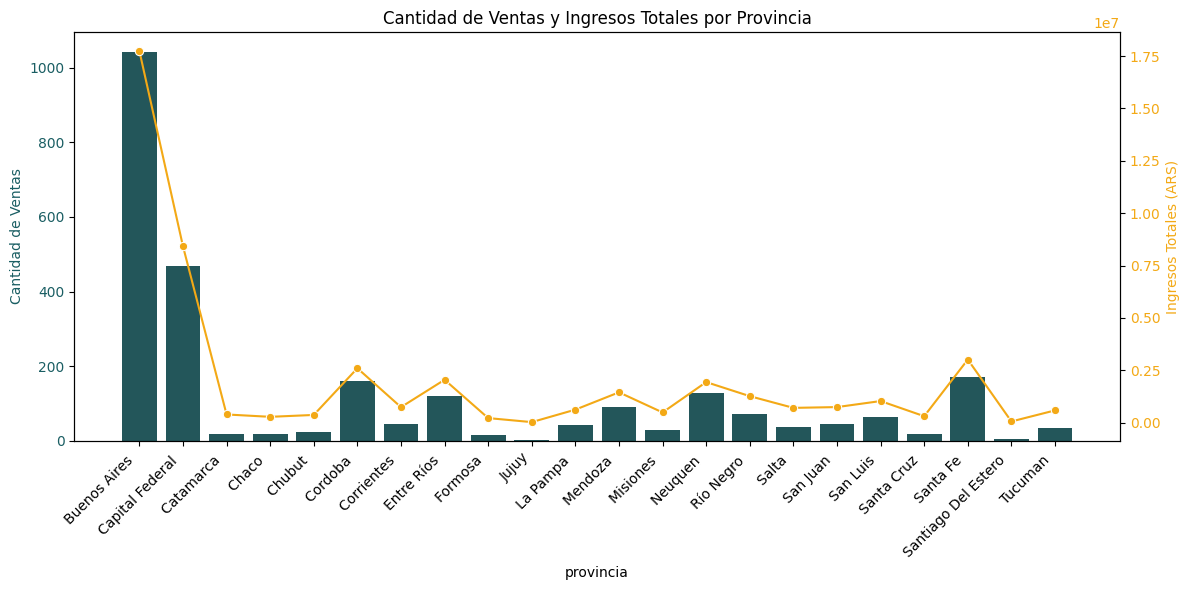

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x='provincia', y='cantidad_ventas', data=zona_ventas_ingresos, color='#1a5e63', ax=ax1)
ax1.set_ylabel('Cantidad de Ventas', color='#1a5e63')
ax1.tick_params(axis='y', labelcolor='#1a5e63')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x='provincia', y='ingresos_totales', data=zona_ventas_ingresos, color='#f3a916', marker='o', ax=ax2)
ax2.set_ylabel('Ingresos Totales (ARS)', color='#f3a916')
ax2.tick_params(axis='y', labelcolor='#f3a916')

plt.title('Cantidad de Ventas y Ingresos Totales por Provincia')
plt.tight_layout()
plt.show()


Existe una relación directa entre cantida de ventas e ingresos

**¿Existen diferencias en la demanda de talles grandes o chicos según la provincia?**

In [ ]:
#Agrego el dato del talle a la variable creada de ventas full
ventas_full_talle = ventas_full.merge(df_talle, left_on='id_talle', right_on='id_talle', how='left')


In [ ]:
#Clasifico los talles chicos y los talles grandes para analizarlos en grupo
talles_chicos = ['M', 'L', 'XL']
talles_grandes = ['2XL', '3XL', '4XL','5XL']

def clasificar_talle(talle):
    if talle in talles_chicos:
        return 'Chico'
    elif talle in talles_grandes:
        return 'Grande'
    else:
        return 'Intermedio'

ventas_full_talle['categoria_talle'] = ventas_full_talle['nombre_talle'].apply(clasificar_talle)

ventas_por_provincia_talle = ventas_full_talle.groupby(['provincia', 'categoria_talle']).size().reset_index(name='cantidad_ventas')


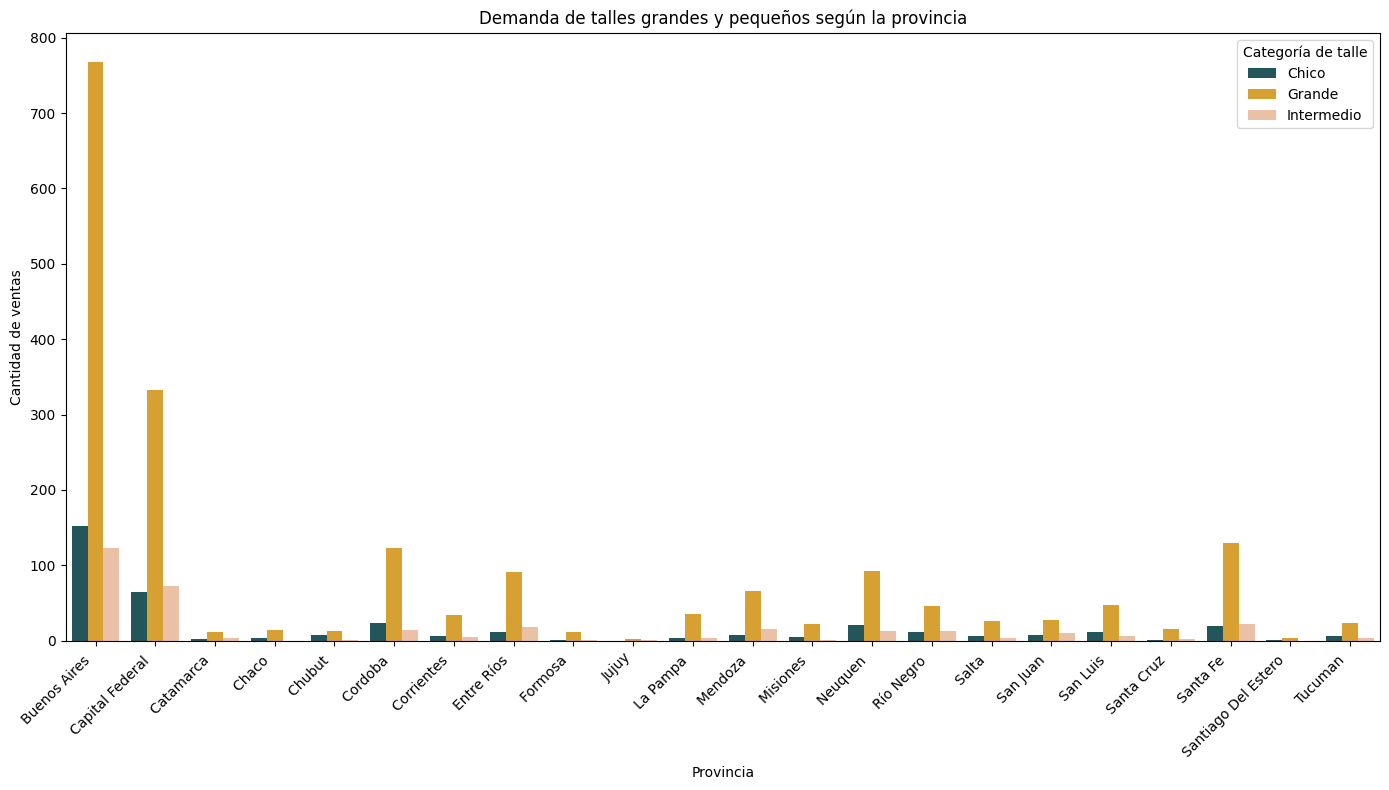

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='provincia', y='cantidad_ventas', hue='categoria_talle', data=ventas_por_provincia_talle, palette=['#1a5e63', '#f3a916', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Demanda de talles grandes y pequeños según la provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Categoría de talle')
plt.tight_layout()
plt.show()


Se observa una tendencia en todas las provincias a los talles grandes, no se aprecian diferencias geograficas considerables

*  ¿Qué combinación de talle y región representa la mayor oportunidad de ventas para la marca?

In [ ]:
# Agrupo por provincia y talle, contamos ventas
ventas_talle_provincia = ventas_full_talle.groupby(['provincia', 'nombre_talle']).size().reset_index(name='cantidad_ventas')

tabla_calor = ventas_talle_provincia.pivot(index='nombre_talle', columns='provincia', values='cantidad_ventas').fillna(0)



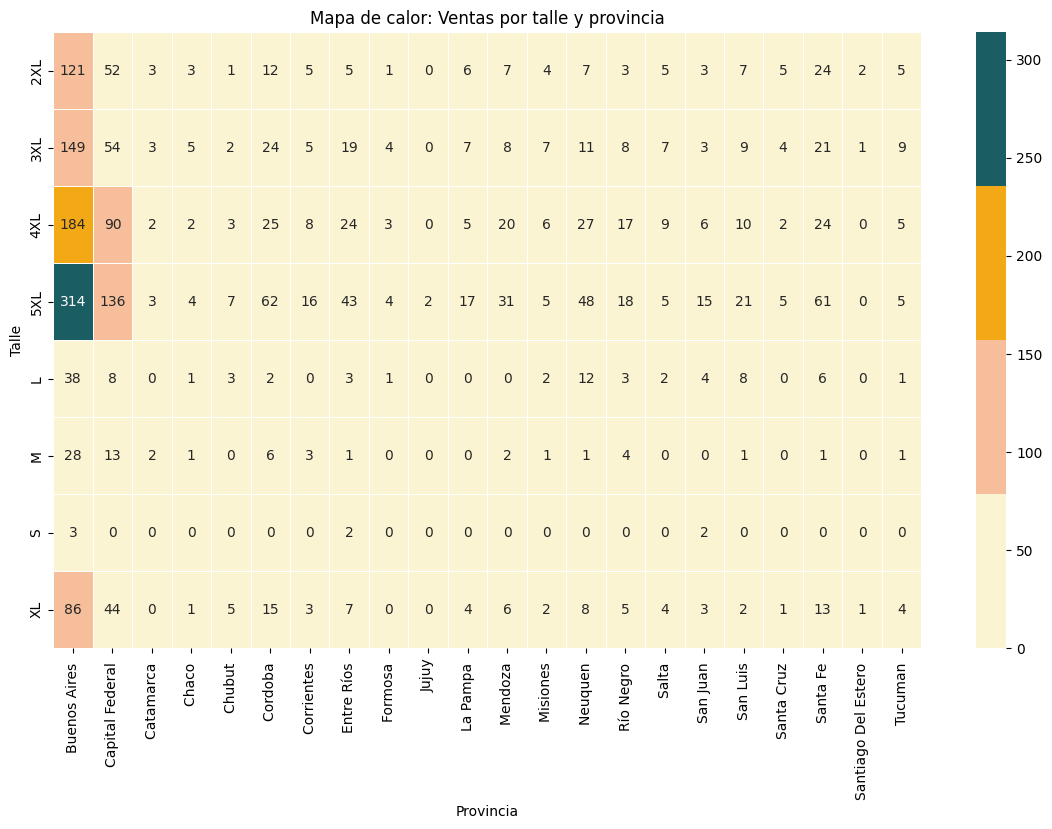

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(tabla_calor, cmap=sns.color_palette(['#faf4d3', '#f6be9a', '#f3a916', '#1a5e63']), annot=True, fmt='.0f', linewidths=0.5)
plt.title('Mapa de calor: Ventas por talle y provincia')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.show()


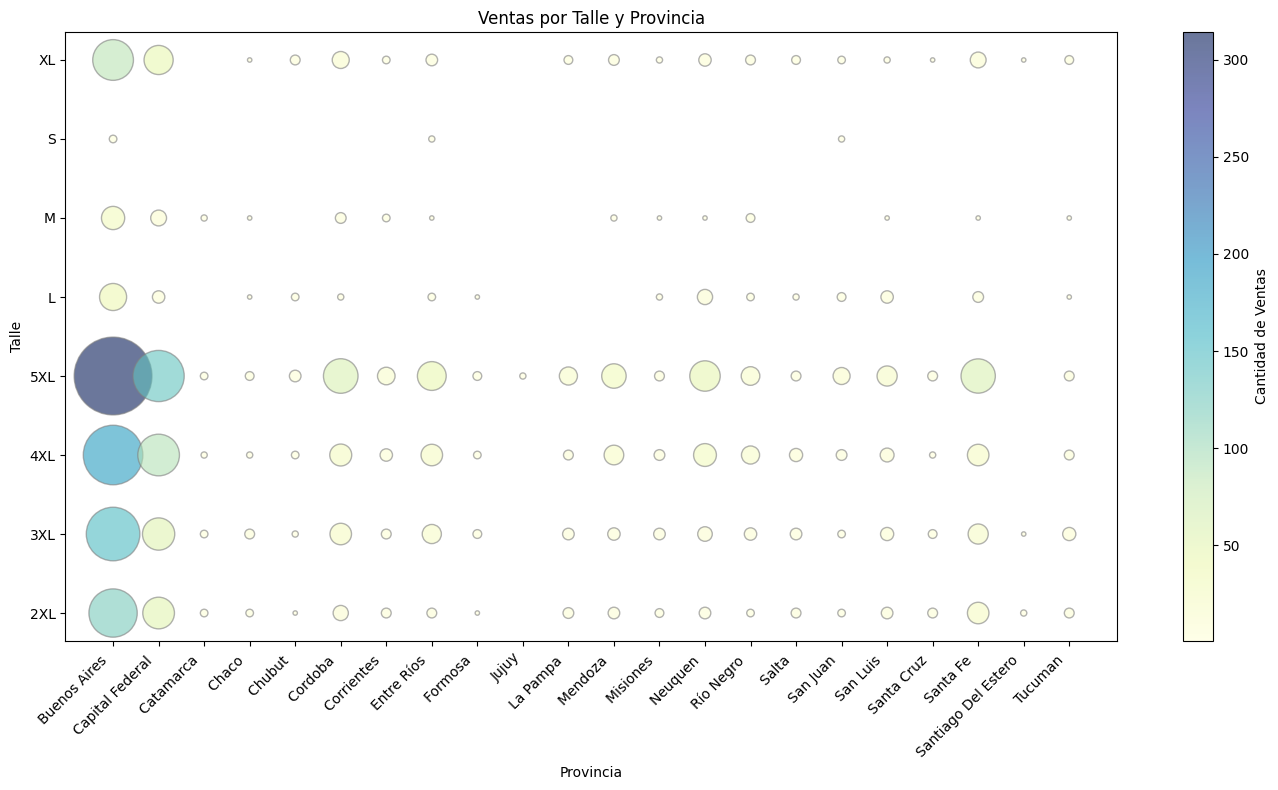

In [ ]:
plt.figure(figsize=(14, 8))

# Debido a que hay mucha diferencias entre talles escalo los tamaños de las burbujas para que no sean demasiado grandes
tamanio = ventas_talle_provincia['cantidad_ventas'] * 10

plt.scatter(
    ventas_talle_provincia['provincia'],
    ventas_talle_provincia['nombre_talle'],
    s=tamanio,
    c=ventas_talle_provincia['cantidad_ventas'],
    cmap='YlGnBu',
    alpha=0.6,
    edgecolors='grey'
)

plt.colorbar(label='Cantidad de Ventas')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.title('Ventas por Talle y Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**¿Dónde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?**

In [ ]:
# Calculo frecuencia de compra por cliente
frecuencia_clientes = ventas_full.groupby('id_clientes').size().reset_index(name='frecuencia_compra')
clientes_provincia = ventas_full[['id_clientes', 'provincia']].drop_duplicates(subset='id_clientes')
frecuencia_clientes = frecuencia_clientes.merge(clientes_provincia, on='id_clientes', how='left')


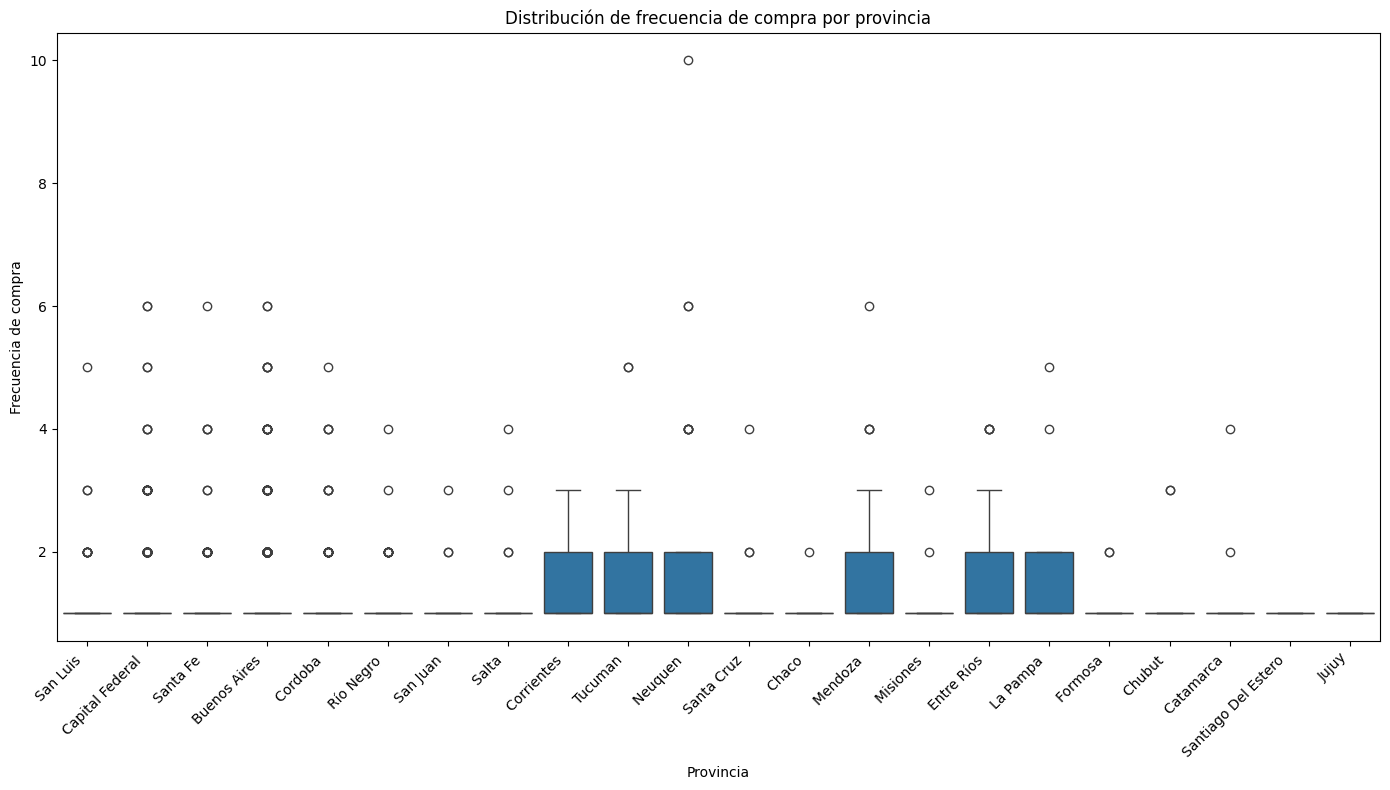

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()


/tmp/ipython-input-37-602072968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-37-602072968.py:2: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


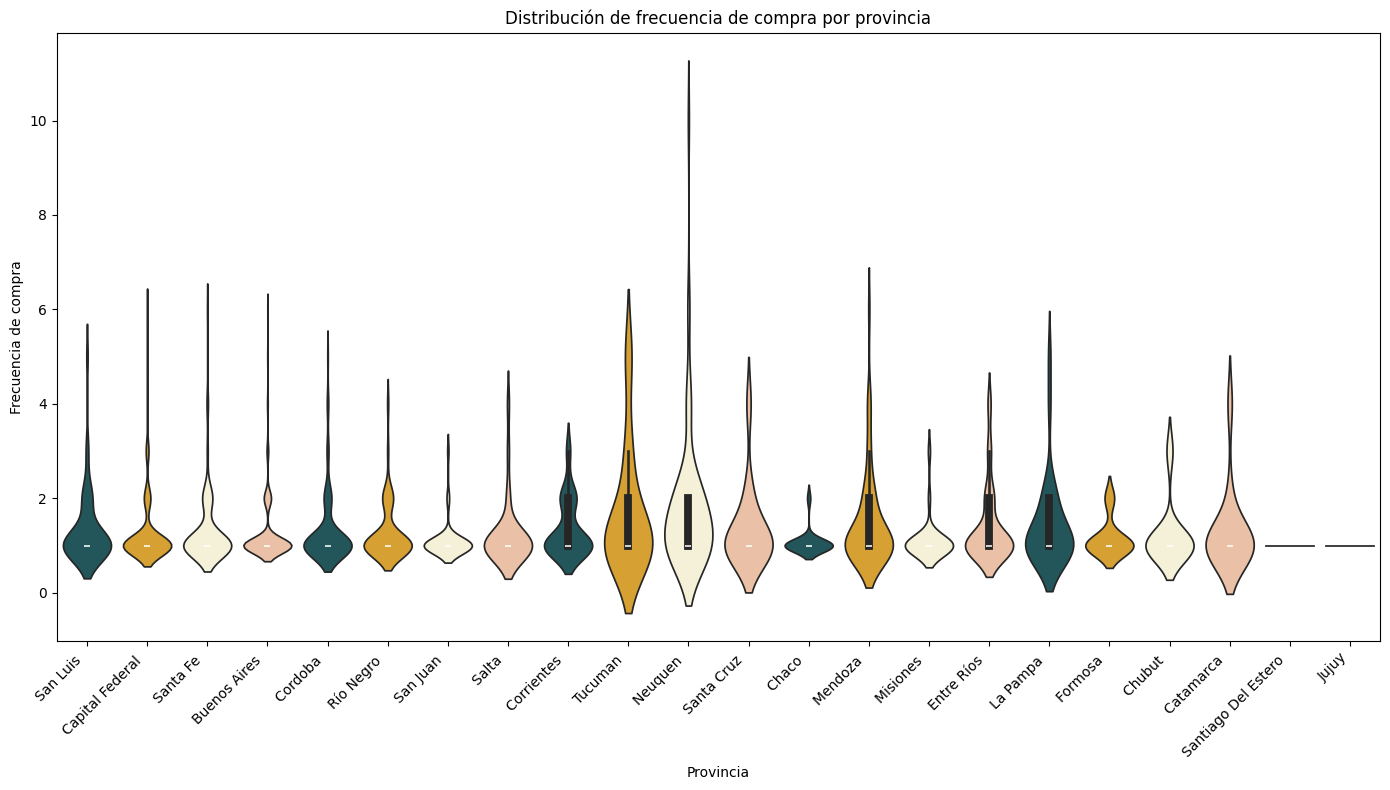

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()



Se observan en provincias como Tucumán, Neuquén, Santa Cruz y Misiones mayor fidelidad. En provincias como Jujuy, Catamarca y Santiago del Estero observa frecuencia más baja y homogénea.

# **Análisis exploratorio de la base de datos de clientes de la web**

In [ ]:
#Veo el tamaño del dataset de clientes de la web
dfweb.shape

(963, 5)

In [ ]:
#Veo que tipo de datos para cada columna
dfweb.dtypes

,0
Apellido,object
Primer nombre,object
CP,object
LOCALIDAD,object
PROVINCIA,object


In [ ]:
#Transformo la columna de Codigo postal de object a intenger
dfweb['CP'] = pd.to_numeric(dfweb['CP'], errors='coerce').astype('Int64')


In [ ]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'CHUBUT' 'Tucuman' 'Usuahia'
 'Neuquén' 'Santiago del estero' 'Chubut' 'Córdoba' 'Santa Cruz'
 'Corrientes' 'Avellaneda' 'buenos Aires' 'San Luis' 'Río Negro' 'Códoba'
 'La Pampa' 'CHACO' 'entre rios' 'Misiones' 'Entre Rios' 'Cordoba'
 'Quilmes' 'Chaco' 'Santiago del Estero' 'Entre Ríos' nan 'Bs As' 'Bs.A.'
 'Rosario' 'San isidro' 'Santa Fé' 'Tucumán' '3 C' 'MENDOZA' 'SAN ISIDRO'
 'Catamarca' 'Bs.As' 'Jujuy' 'Wilde' 'San Juan' 'Mar del Plata'
 'Ballester' 'Tres de Febrero' 'Salta' 'Formosa' 'Capital Federal'
 'Entre Rìos']


In [ ]:
mapeo_provincias = {
    'Buenos Aires': 'Buenos Aires',
    'buenos Aires': 'Buenos Aires',
    'Bs As': 'Buenos Aires',
    'Bs.A.': 'Buenos Aires',
    'Bs.As': 'Buenos Aires',

    'CABA': 'CABA',
    'Capital Federal': 'CABA',

    'Cordoba': 'Córdoba',
    'Córdoba': 'Córdoba',
    'Códoba': 'Córdoba',

    'Entre Rios': 'Entre Ríos',
    'entre rios': 'Entre Ríos',
    'Entre Rìos': 'Entre Ríos',

    'Santa Fé': 'Santa Fe',

    'Chaco': 'Chaco',
    'CHACO': 'Chaco',

    'Chubut': 'Chubut',
    'CHUBUT': 'Chubut',

    'MENDOZA': 'Mendoza',

    'San isidro': 'Buenos Aires',
    'SAN ISIDRO': 'Buenos Aires',
    'Avellaneda': 'Buenos Aires',
    'Quilmes': 'Buenos Aires',
    'Rosario': 'Santa Fe',
    'Wilde': 'Buenos Aires',
    'Ballester': 'Buenos Aires',
    'Mar del Plata': 'Buenos Aires',
    'Tres de Febrero': 'Buenos Aires',
    '3 C': 'Buenos Aires',

    'Santiago del estero': 'Santiago del Estero',

    'Mendoza': 'Mendoza',
    'Tucumán': 'Tucumán',
    'Tucuman': 'Tucumán',
    'Neuquén': 'Neuquén',
    'Santa Cruz': 'Santa Cruz',
    'Corrientes': 'Corrientes',
    'San Luis': 'San Luis',
    'Río Negro': 'Río Negro',
    'La Pampa': 'La Pampa',
    'Misiones': 'Misiones',
    'San Juan': 'San Juan',
    'Salta': 'Salta',
    'Formosa': 'Formosa',
    'Jujuy': 'Jujuy',
    'Catamarca': 'Catamarca',
    'Usuahia' : 'Tierra del fuego'
}


In [ ]:
dfweb['PROVINCIA'] = dfweb['PROVINCIA'].map(lambda x: mapeo_provincias.get(x, x))


In [ ]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'Chubut' 'Tucumán'
 'Tierra del fuego' 'Neuquén' 'Santiago del Estero' 'Córdoba' 'Santa Cruz'
 'Corrientes' 'San Luis' 'Río Negro' 'La Pampa' 'Chaco' 'Entre Ríos'
 'Misiones' nan 'Catamarca' 'Jujuy' 'San Juan' 'Salta' 'Formosa']


Si bien esta base de datos no contiene información directa sobre las ventas, puedo establecer una relación entre la provincia y la cantidad de clientes. Este análisis permite tener un acercamiento al comportamiento de las ventas en el sitio web. Sin embargo, es importante destacar que no es completamente fiable, ya que un mismo cliente podría haber realizado múltiples compras y/o adquirido varias prendas. Aun así, si se observa una tendencia clara en la distribución de clientes por provincia, puede aportar información valiosa para contrastar con la realidad de las ventas mediante Mercadolibre

In [ ]:
# Relación provincia / clientes
clientes_por_provincia = dfweb.groupby('PROVINCIA').size().reset_index(name='Cantidad_clientes')

clientes_por_provincia = clientes_por_provincia.sort_values(by='Cantidad_clientes', ascending=False)

clientes_por_provincia


,PROVINCIA,Cantidad_clientes
0,Buenos Aires,386
1,CABA,191
19,Santa Fe,63
6,Córdoba,23
11,Mendoza,18
7,Entre Ríos,17
4,Chubut,14
14,Río Negro,9
13,Neuquén,6
10,La Pampa,6


/tmp/ipython-input-46-2370843367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-46-2370843367.py:5: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


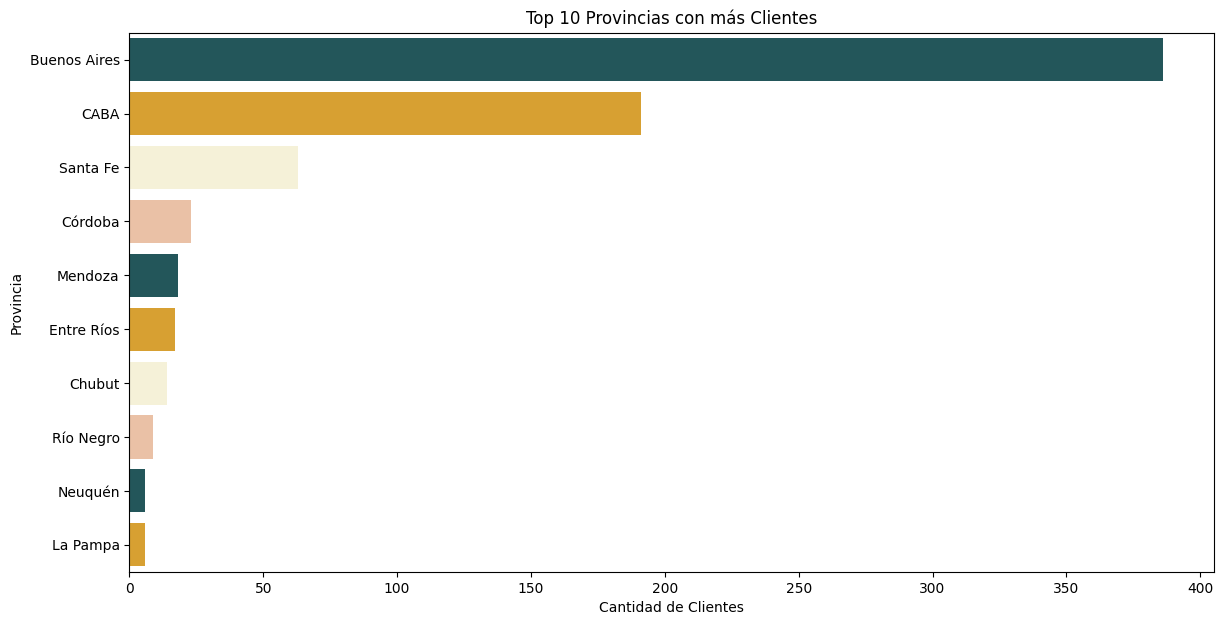

In [ ]:
# Tomo las 10 provincias con más clientes para que el grafico se comprenda mejor
clientes_top10 = clientes_por_provincia.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.title('Top 10 Provincias con más Clientes')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Provincia')
plt.show()


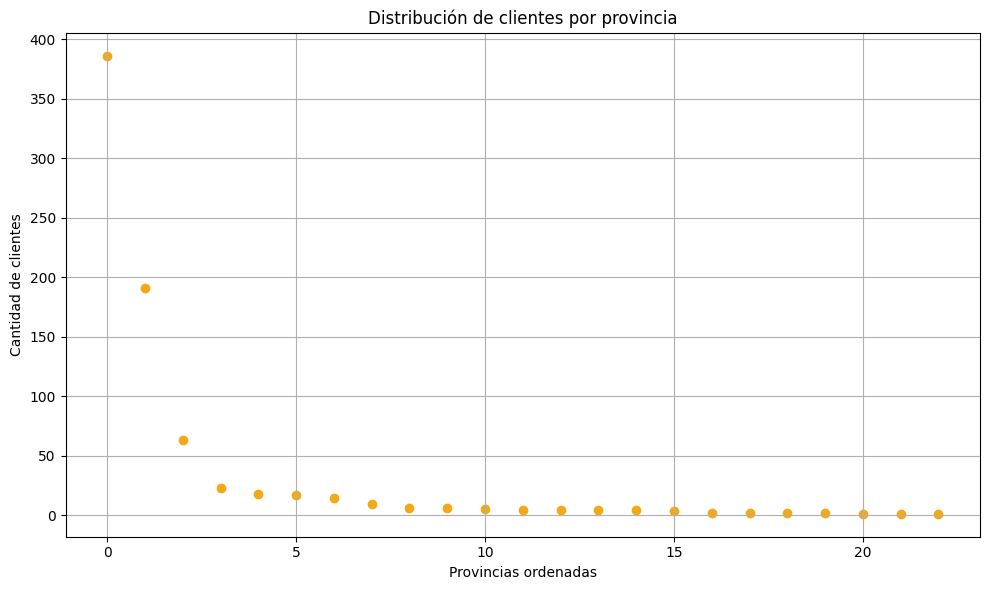

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(clientes_por_provincia)),
            clientes_por_provincia['Cantidad_clientes'],
            color=colores_marca[1])

plt.xlabel('Provincias ordenadas')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes por provincia')
plt.grid(True)
plt.tight_layout()
plt.show()



Se observa un comportamiento similar al de la plataforma de mercadolibre en terminos absolutos, sin tener en cuenta la densidad poblacional.

# Insights

👍 1. Clientes con mayor frecuencia de compra (fidelidad)

Se identificaron provincias donde los clientes realizan compras con mayor
frecuencia, lo que refleja altos niveles de fidelidad. Las provincias destacadas son Tucumán, Neuquén, Santa Cruz, Misiones y Mendoza. Esto sugiere una oportunidad para potenciar el crecimiento del mercado en estas zonas mediante estrategias de marketing dirigidas a nuevos clientes, aprovechando la alta fidelización ya existente.

👍 2. Provincias con alta frecuencia promedio no necesariamente tienen mayores ingresos totales.

 Aunque provincias como Buenos Aires y Capital Federal concentran los ingresos totales más altos, no tienen la frecuencia promedio de compra más elevada. Esto sugiere que existe un margen para desarrollar estrategias de fidelización y recompra en estas áreas, aprovechando la gran cantidad de clientes.

👍 3. Preferencia por talles grandes

Los datos revelan una clara preferencia por los talles grandes. Los talles más elegidos corresponden a 2XL, 3XL, 4XL y 5XL, lo cual es relevante para orientar la producción, el stock y las campañas de marketing.